In [68]:
import csv
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [69]:
cl_path = "C:/Users/cynth/project-one/data/crime_data.csv"

In [107]:
def make_df(cl_path): # Reads the csv file in and makes it a DataFrame
    df = pd.read_csv(cl_path)
    return df

In [71]:
directory = os.path.dirname(cl_path)

In [72]:
dir_string = str(directory) + "/crime_data.csv"

In [73]:
#path = os.path.realpath(__file__)
#directory = os.path.dirname(path)
#dir_string = str(directory) + "/data/crime_data.csv"

In [74]:
all_data_df = make_df(dir_string)

In [75]:
date_crime = pd.concat([all_data_df['Occurred Date'], all_data_df['Highest Offense Description']], axis=1)

In [76]:
crimes = date_crime['Highest Offense Description'].unique()

In [77]:
filtered_theft_crime = date_crime[date_crime['Highest Offense Description'].str.contains('theft', case=False)]

In [78]:
filtered_burgl_crime = date_crime[date_crime['Highest Offense Description'].str.contains('burglary', case=False)]

In [79]:
all_theft_crimes = pd.concat([filtered_theft_crime, filtered_burgl_crime], ignore_index=True)

In [80]:
all_theft_crimes['Occurred Date'] = pd.to_datetime(all_theft_crimes['Occurred Date'], format='mixed')

In [81]:
all_theft_crimes['Season'] = pd.cut(
    all_theft_crimes['Occurred Date'].dt.dayofyear,
    bins= [0, 79, 171, 264, 355, 365],
    labels=['Winter', 'Spring', 'Summer', 'Fall', 'Winter'],
    ordered=False)

In [82]:
season_theft_crimes = all_theft_crimes.drop(columns=['Occurred Date'])

In [83]:
all_theft_crimes.tail(10)

,Occurred Date,Highest Offense Description,Season
869172,2009-09-04,BURGLARY OF VEHICLE,Summer
869173,2007-05-29,BURGLARY OF VEHICLE,Spring
869174,2010-12-03,BURGLARY OF RESIDENCE,Fall
869175,2005-04-23,BURGLARY OF RESIDENCE,Spring
869176,2005-12-07,BURGLARY OF VEHICLE,Fall
869177,2009-01-21,BURGLARY OF VEHICLE,Winter
869178,2009-08-18,BURGLARY OF RESIDENCE,Summer
869179,2015-05-16,BURGLARY OF VEHICLE,Spring
869180,2009-06-19,BURGLARY OF RESIDENCE,Spring
869181,2013-04-03,BURGLARY OF VEHICLE,Spring


In [84]:
season_theft_crimes.head()

,Highest Offense Description,Season
0,IDENTITY THEFT,Fall
1,THEFT,Fall
2,THEFT,Fall
3,THEFT,Winter
4,THEFT,Fall


In [85]:
column_names = season_theft_crimes.columns

# Print column names
print(column_names)

Index(['Highest Offense Description', 'Season'], dtype='object')


In [86]:
season_theft_crimes_count = season_theft_crimes.groupby('Highest Offense Description').count()
season_theft_crimes_count.head()

,Season
Highest Offense Description,
ATT AUTO THEFT,307
ATT BURGLARY NON RESIDENCE,156
ATT BURGLARY OF RESIDENCE,457
ATT THEFT,206
AUTO THEFT,61139


In [23]:
column_names = season_theft_crimes_count.columns

# Print column names
print(column_names)

Index(['Season'], dtype='object')


In [24]:
value_counts = season_theft_crimes['Highest Offense Description'].value_counts()

# Print the value counts
print(value_counts)

Highest Offense Description
BURGLARY OF VEHICLE                              254167
THEFT                                            229451
BURGLARY OF RESIDENCE                             82077
AUTO THEFT                                        61170
THEFT BY SHOPLIFTING                              54376
BURGLARY NON RESIDENCE                            41154
IDENTITY THEFT                                    28744
THEFT OF BICYCLE                                  24192
THEFT OF SERVICE                                  14903
THEFT FROM AUTO                                   10730
THEFT OF LICENSE PLATE                            10052
THEFT FROM PERSON                                  9123
BURGLARY OF VEH-NO SUSPECT/FU                      8503
MAIL THEFT                                         6973
BURGLARY OF SHED/DETACHED GARAGE/STORAGE UNIT      6205
THEFT OF AUTO PARTS                                5455
THEFT CATALYTIC CONVERTER                          4917
THEFT OF TRAILER    

In [25]:
series = pd.Series(value_counts)

# Check if it's a Series using isinstance()
if isinstance(value_counts, pd.Series):
  print("data_structure is a Series")
else:
  print("data_structure is not a Series")

data_structure is a Series


In [26]:
# Transpose the Series (swap rows and columns)
#transposed_data = filtered_value_counts.transpose()


# Create the bar chart
#plt.figure(figsize=(8, 6))  # Optional: Set figure size
#transposed_data.plot(kind='bar', color='lightblue')  # color argument is optional

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45)  # Set rotation angle (adjust as needed)

# Add labels and title (optional)
#plt.xlabel('Type of Theft')  # Adjust label based on your Series
#plt.ylabel('Occurances (Index)')
#plt.title('Rank of Highest Reported Types of Theft for the Last 20 Years')

# Customize x-axis ticks and grid (optional)
#plt.xticks(rotation=0)  # Rotate x-axis labels for better readability
#plt.grid(axis='y', linestyle='--', alpha=0.6)  # Add dashed grid lines on y-axis

# Display the chart
#plt.tight_layout()  # Adjust spacing for better presentation
#plt.show()

In [27]:
filtered_value_counts = value_counts[value_counts > 10000]

# Print the filtered Series
print(filtered_value_counts)

Highest Offense Description
BURGLARY OF VEHICLE       254167
THEFT                     229451
BURGLARY OF RESIDENCE      82077
AUTO THEFT                 61170
THEFT BY SHOPLIFTING       54376
BURGLARY NON RESIDENCE     41154
IDENTITY THEFT             28744
THEFT OF BICYCLE           24192
THEFT OF SERVICE           14903
THEFT FROM AUTO            10730
THEFT OF LICENSE PLATE     10052
Name: count, dtype: int64


In [28]:
new_theft_df = pd.DataFrame(
    {"Type of Theft": ["Theft", "Auto Theft", "Theft by Shoplifting", "Identity Theft", "Theft of Bicycle", "Theft of Service", "Theft from Auto", "Theft of License Plate"], 
     "No. of Occurrences": [229451, 61170, 54376, 28744, 24192, 14903, 10730, 10052]})
new_theft_df

,Type of Theft,No. of Occurrences
0,Theft,229451
1,Auto Theft,61170
2,Theft by Shoplifting,54376
3,Identity Theft,28744
4,Theft of Bicycle,24192
5,Theft of Service,14903
6,Theft from Auto,10730
7,Theft of License Plate,10052


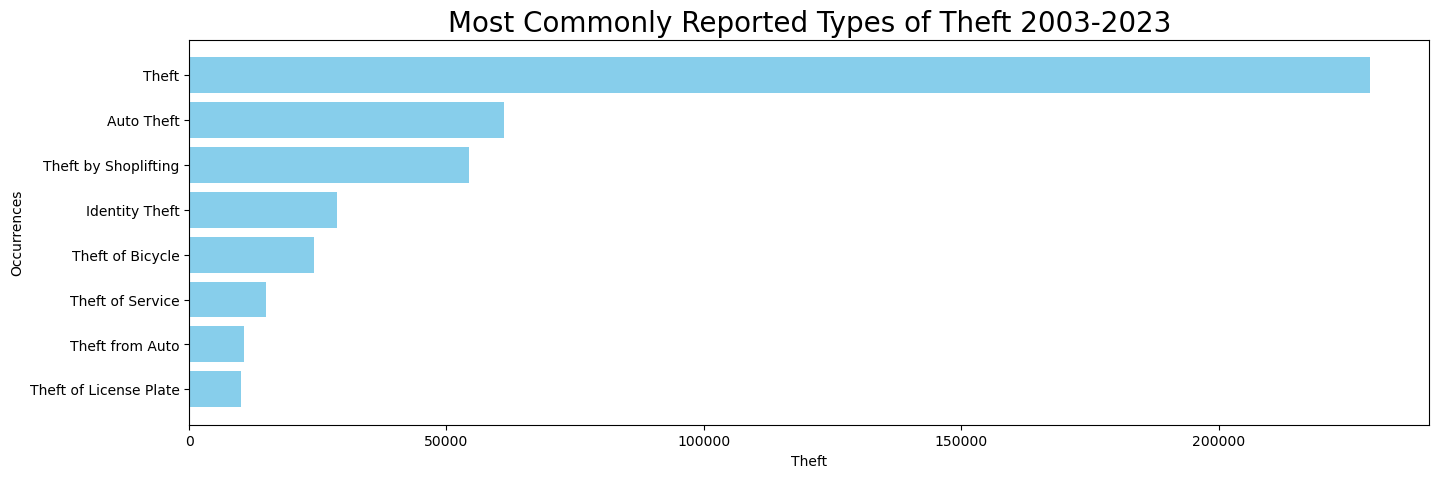

In [116]:
Theft = ["Theft", "Auto Theft", "Theft by Shoplifting", "Identity Theft", "Theft of Bicycle", "Theft of Service", "Theft from Auto", "Theft of License Plate"]
Occurrances = [229451, 61170, 54376, 28744, 24192, 14903, 10730, 10052]
plt.figure(figsize=(16,5))
colors = ['skyblue']
plt.barh(Theft, Occurrances, color=colors)


    
# Set chart title and labels
plt.title('Most Commonly Reported Types of Theft 2003-2023', fontsize=20)
plt.xlabel('Theft')
plt.ylabel('Occurrences')

plt.gca().invert_yaxis()


In [30]:
# Convert Series to DataFrame (assuming index as category labels)
#value_counts_df = value_counts.to_frame(name='No. of Reported Occurences')
#value_counts_df.head()

In [31]:
#column_names = season_theft_crimes.columns

# Print column names
#print(column_names)

In [32]:
season_theft_crimes_res = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'THEFT']

In [33]:
season_theft_crimes_res.head()

,Highest Offense Description,Season
1,THEFT,Fall
2,THEFT,Fall
3,THEFT,Winter
4,THEFT,Fall
6,THEFT,Fall


In [34]:
season_theft_crimes_res.index.name = 'Index'

In [35]:
season_theft_crimes_res.head()

,Highest Offense Description,Season
Index,,
1,THEFT,Fall
2,THEFT,Fall
3,THEFT,Winter
4,THEFT,Fall
6,THEFT,Fall


In [36]:
season_theft_crimes_res.index.is_monotonic_increasing

True

In [37]:
season_theft_crimes_res_gb = season_theft_crimes_res.groupby('Season')['Highest Offense Description'].count()

C:\Users\cynth\AppData\Local\Temp\ipykernel_10440\473653629.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_res_gb = season_theft_crimes_res.groupby('Season')['Highest Offense Description'].count()


In [38]:
season_theft_crimes_res_gb

Season
Fall      57656
Spring    57971
Summer    59909
Winter    53779
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Occurrences')

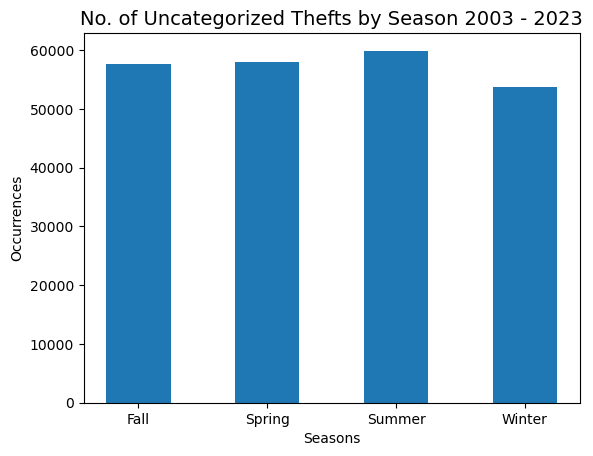

In [120]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [57656, 57971, 59909, 53779]
bar_width = 0.5
plt.bar(Seasons, Occurrances, width=bar_width)

# Set chart title and labels
plt.title('No. of Uncategorized Thefts by Season 2003 - 2023', fontsize=14)
plt.xlabel('Seasons')
plt.ylabel('Occurrences')


In [40]:
season_theft_crimes_shoplift = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'THEFT BY SHOPLIFTING']

In [41]:
season_theft_crimes_shoplift_gb = season_theft_crimes_shoplift.groupby('Season')['Highest Offense Description'].count()

C:\Users\cynth\AppData\Local\Temp\ipykernel_10440\1265304022.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_shoplift_gb = season_theft_crimes_shoplift.groupby('Season')['Highest Offense Description'].count()


In [42]:
season_theft_crimes_shoplift_gb

Season
Fall      13273
Spring    13554
Summer    13791
Winter    13730
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

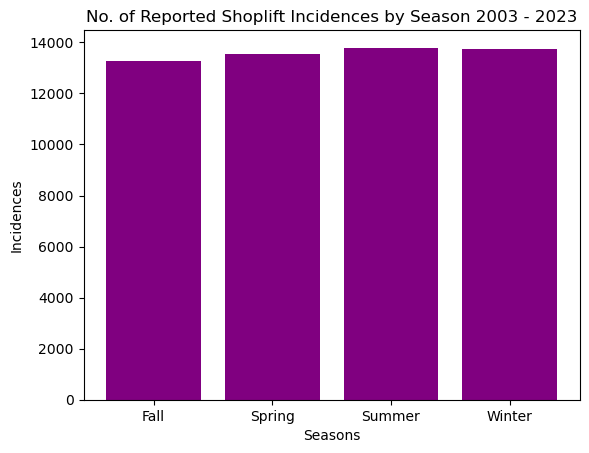

In [122]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [13273, 13554, 13791, 13730]
colors = ['purple']
plt.bar(Seasons, Occurrances, color=colors)

# Set chart title and labels
plt.title('No. of Reported Shoplift Incidences by Season 2003 - 2023', fontsize=12)
plt.xlabel('Seasons')
plt.ylabel('Incidences')

In [44]:
num_rows_theft_rs = len(season_theft_crimes_res)
print(num_rows_theft_rs)  # Output: 3

229451


In [45]:
num_rows_shoplift = len(season_theft_crimes_shoplift)
print(num_rows_shoplift)  # Output: 3

54376


In [46]:
season_theft_crimes_BICYCLE = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'THEFT OF BICYCLE']

In [47]:
season_theft_crimes_BICYCLE_gb = season_theft_crimes_BICYCLE.groupby('Season')['Highest Offense Description'].count()

C:\Users\cynth\AppData\Local\Temp\ipykernel_10440\689256341.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_BICYCLE_gb = season_theft_crimes_BICYCLE.groupby('Season')['Highest Offense Description'].count()


In [48]:
season_theft_crimes_BICYCLE_gb

Season
Fall      6284
Spring    6039
Summer    6789
Winter    5072
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

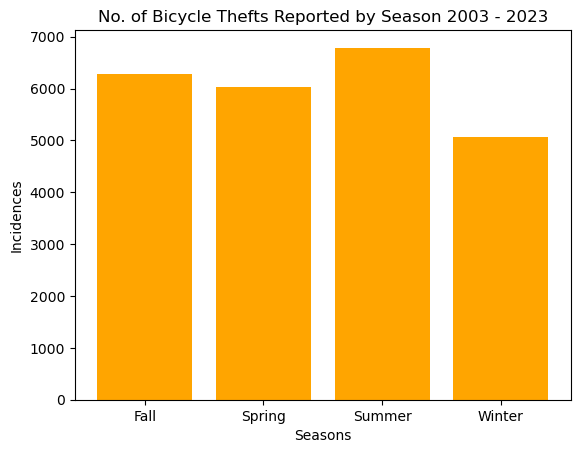

In [49]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [6284, 6039, 6789, 5072]
colors = ['orange']
plt.bar(Seasons, Occurrances, color=colors)

# Set chart title and labels
plt.title('No. of Bicycle Thefts Reported by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Incidences')

In [50]:
season_theft_crimes_IDENTITY = season_theft_crimes[season_theft_crimes['Highest Offense Description'] == 'IDENTITY THEFT']

In [51]:
season_theft_crimes_IDENTITY_gb = season_theft_crimes_IDENTITY.groupby('Season')['Highest Offense Description'].count()

C:\Users\cynth\AppData\Local\Temp\ipykernel_10440\3953253815.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  season_theft_crimes_IDENTITY_gb = season_theft_crimes_IDENTITY.groupby('Season')['Highest Offense Description'].count()


In [52]:
season_theft_crimes_IDENTITY_gb

Season
Fall      6380
Spring    7645
Summer    6494
Winter    8208
Name: Highest Offense Description, dtype: int64

Text(0, 0.5, 'Incidences')

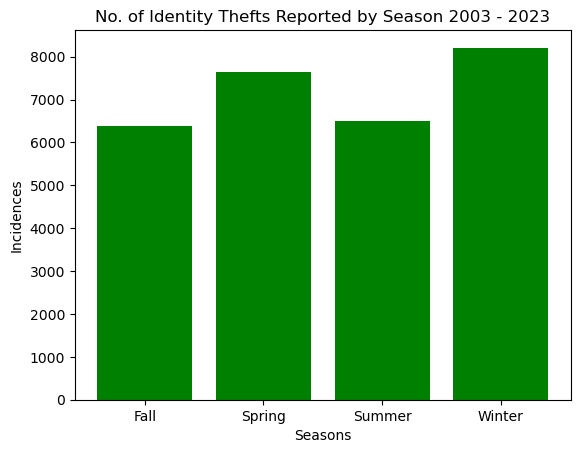

In [53]:
Seasons = ["Fall", "Spring", "Summer", "Winter"]
Occurrances = [6380, 7645, 6494, 8208]
colors = ['green']
plt.bar(Seasons, Occurrances, color=colors)

# Set chart title and labels
plt.title('No. of Identity Thefts Reported by Season 2003 - 2023')
plt.xlabel('Seasons')
plt.ylabel('Incidences')